In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import defaultdict
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
import tensorflow as tf
from sklearn.metrics import f1_score
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from numpy import array
from numpy import asarray
from numpy import zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding,Activation,Dropout
from keras.layers import Conv1D,MaxPooling1D,GlobalMaxPooling1D,LSTM

In [2]:
# load train and test datasets
columns = ["Id","Entity","Target","Text"]
train= pd.read_csv('twitter_training.csv',names=columns,header=None)
test=pd.read_csv('twitter_validation.csv',names=columns,header=None)


In [3]:
# check the no. of rows and columns in the dataset
train.shape, test.shape

((74682, 4), (1000, 4))

In [4]:
train.head()

,Id,Entity,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
train.isnull().sum().sort_values(ascending = False)

Text      686
Id          0
Entity      0
Target      0
dtype: int64

In [6]:
# function to draw bar plot
def draw_bar_plot(category,length,xlabel,ylabel,title,sub):
    plt.subplot(2,2,sub)
    plt.bar(category, length,color = 'grbkymc')
    plt.legend()
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title, fontsize=15)
    #plt.show()

In [62]:
len(train[train.Target=='Positive']["length"])

20832

In [74]:
# function to draw histogram
def draw_hist(xlabel, ylabel,title,target,sub,color):
    plt.subplot(1,3,sub)
    plt.hist(train[train.Target==target]["length"],color = color)
    plt.title(title,fontsize=25)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.ylim(0,10000)
    plt.grid()

In [75]:
# function to draw graphs for stopwords and punctuations
def draw_bar_n_plot(data,title):
# lets visualize the top 10 stop words
    x,y=zip(*data)

    plt.figure(figsize = (25,10))
    plt.subplot(1,4,1)
    plt.bar(x,y,color='grbkymc')
    plt.title("Top 10 "+ title,fontsize=25)
    plt.xlabel(title,fontsize=15)
    plt.ylabel("Count",fontsize=15)
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(x,y,'g')
    plt.title("Top 10 "+ title,fontsize=25)
    plt.xlabel(title,fontsize=15)
    plt.ylabel("Count",fontsize=15)
    plt.grid()

In [76]:
# check class distribution

print("No. of Positive Tweets (Target = 'Positive''):",len(train[train["Target"]=='Positive']))
print("No. of Positive Tweets (Target = 'Negative''):",len(train[train["Target"]=='Negative']))
print("No. of Positive Tweets (Target = 'Neutral''):",len(train[train["Target"]=='Neutral']))
print("No. of Positive Tweets (Target = 'Irrelevant''):",len(train[train["Target"]=='Irrelevant']))

No. of Positive Tweets (Target = 'Positive''): 20832
No. of Positive Tweets (Target = 'Negative''): 22542
No. of Positive Tweets (Target = 'Neutral''): 18318
No. of Positive Tweets (Target = 'Irrelevant''): 12990


In [77]:
# lets visualize the class distribution
#plt.figure(figsize = (12,8))
#draw_bar_plot(["Real","Fake"],[len(train[train.target==1]), len(train[train.target==0])],"Real Vs Fake","Number of Tweets","Class Distribution",1)

In [78]:
# we will now check the length of "real disaster" vs lenght of "fake disaster" tweets
# lets first add a new field to the dataset called "length"
def length(text):    
    return len(text)

In [24]:
train["length"]= train.Text.astype(str).apply(length)

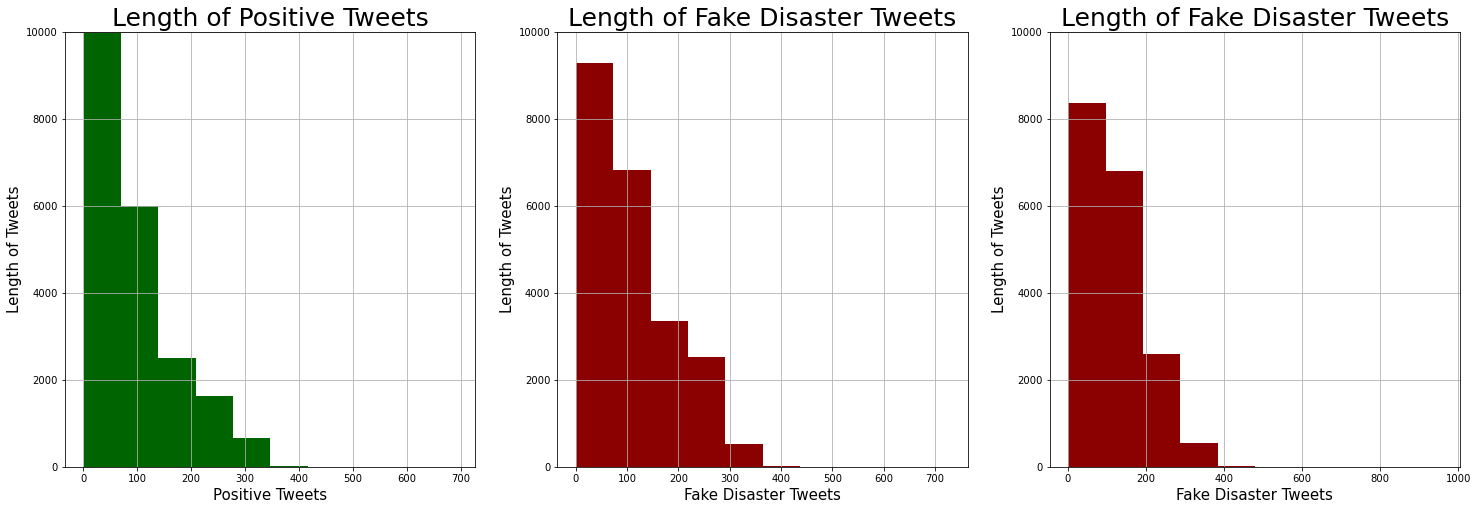

In [79]:
# lets see the distribution of length of tweets real vs fake

plt.figure(figsize = (25,8))
draw_hist("Positive Tweets","Length of Tweets","Length of Positive Tweets",'Positive', 1,"darkgreen")
draw_hist("Fake Disaster Tweets","Length of Tweets","Length of Fake Disaster Tweets",'Negative', 2,"darkred")
draw_hist("Fake Disaster Tweets","Length of Tweets","Length of Fake Disaster Tweets",'Neutral', 3,"darkred")